# Tutorial: Neural Networks for Image Classification with Convolution

In [1]:
# Change directory, only necessary for this notebook
import sys, os
sys.path.insert(0,os.path.abspath('../../../'))

## Imports

In [2]:
import pandas as pd
import numpy as np
import mnist
import scipy.misc

from PIL import Image

from pyml.neural_network.nn import NN
from pyml.neural_network.layer.transformation import *
from pyml.neural_network.layer.activation import *
from pyml.neural_network.optimizer import *
from pyml.neural_network.loss import *
from pyml.utils.accuracy import *

## Prepare data

In [3]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

def preprocess_binary_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    # x = x.astype("float32") / 255
    return x, y

def preprocess_data(x, y, limit):
    x = x.reshape(len(x), 1, 28, 28)
    # x = x.astype("float32") / 255
    return x, y

train_images, train_labels = preprocess_data(train_images, train_labels, 1000)
test_images, test_labels = preprocess_data(test_images, test_labels, 1000)

mnist.temporary_dir()

'/var/folders/kt/fz2n770s5nl7x9529l2zhpww0000gn/T'

### Normalize data

In [4]:
train_images = (train_images.astype('float32') - 127.5) / 127.5
test_images = (test_images.astype('float32') - 127.5) / 127.5

### Visualize the data

Image of the number 4


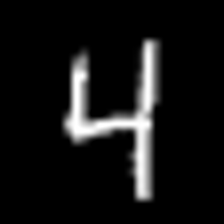

In [5]:
i = 92
resize_factor = 8
print(f'Image of the number {train_labels[i]}')
img = ((train_images[i] + 127.5) * 127.5 / np.max(train_images[i])).astype('uint8')
Image.fromarray(img[0]).resize((28*resize_factor, 28*resize_factor))


## Build the neural network

In [6]:
# Build the model
kernel_size = 3
in_channels = 1
out_channels = 2
data_size = 28
nb_maxpool = 1
out_first_conv = (data_size - kernel_size + 1) // (2*nb_maxpool) - kernel_size + 1
out_first_conv

11

In [7]:
model = NN()


model.add_layer(
    Convolutional(in_channels=in_channels, out_channels=out_channels, kernel_shape=kernel_size),
)
model.add_layer(ReLU())
model.add_layer(
    Convolutional(in_channels=out_channels, out_channels=out_channels, kernel_shape=kernel_size)
)
model.add_layer(ReLU())
model.add_layer(Flatten())
model.add_layer(Dense(1152, 128))
model.add_layer(ReLU())
model.add_layer(Dense(128, 10))
model.add_layer(ReLU())
model.add_layer(Softmax())

model.set_loss(CategoricalCrossentropy())
model.set_optimizer(Adam(learning_rate=0.001))
model.set_accuracy(MultiClassAccuracy())

model.build()

In [ ]:
model.train(
    train_images, 
    train_labels, 
    validation_data=(test_images, test_labels), 
    epochs=40, 
    batch_size=16,
    print_summary_every=1, 
    verbose=1 
)

Image of the number 3
The prediction is 3


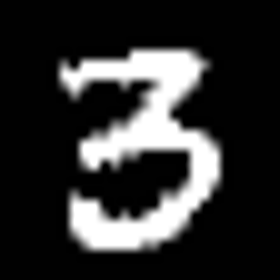

In [ ]:
i = 5555
resize_factor = 10

img = (test_images[i].reshape(28, 28) * 255 / np.max(test_images[i])).astype('uint8')

pred = np.argmax(model.predict(test_images[i].reshape(1, 1, 28, 28)))

print(f'Image of the number {test_labels[i]}')
print(f'The prediction is {pred}')

Image.fromarray(img).resize((28*resize_factor, 28*resize_factor))